
![](Logo3.png)


# Data Wrangling - Manipulación de Datos


## Tabla de Contenido

[1. Que es Data Wrangling](#id1)<br>
[2. Contexto de la práctica](#id2)<br>
[3. Identificar y manejar valores faltantes](#id3)<br>
[4. Manejar valores faltantes](#id4)<br>
[5. Corregir el formato de los datos](#id5)<br>
[6. Estandarización de los Datos](#id6)<br>
[7. Normalización de los Datos (centrado/escalado)](#id7)<br>
[8. Variables dummy o variables indicadoras](#id8)<br>
[9. Discretización de valores](#id9)<br>
[10. Grabar archivo CSV corregido](#id10)<br>

![](DataWrangling.png)


##  1. Que es Data Wrangling  <a id='id1'> </a>

- Es el proceso de tomar datos sin procesar desorganizados o incompletos y estandarizarlos para que pueda acceder a ellos, consolidarlos y analizarlos fácilmente. 
- También implica mapear campos de datos desde el origen hasta el destino, por ejemplo, apuntar a un campo, fila o columna en un conjunto de datos e implementar una acción como unir, analizar, limpiar, consolidar o filtrar para producir el resultado requerido.
- **Data Wrangling es el proceso de convertir los datos desde un formato inicial a uno apropiado para su análisis**.

## 2. Contexto de la práctica    <a id='id2'> </a>

El objetivo de este laboratorio es utilizar métodos de pandas para importar un conjunto de datos y realizar las tareas siguientes:  

1. Identificar los datos faltantes
2. Manejar los datos faltantes
3. corregir el formato de los datos
4. Estandarización de los datos

Trabajará con un archivo que contiene **informacion sobre vehiculos de diferentes marcas, precios, rendimientos, revoluciones, motores, capacidadades, tipo de combustible, entre otras caracteristicas**.  


Este conjunto de datos consta de estas caracteristicas:

- **symboling**: Calificación de riesgo de seguro asignada (valores: -3, -2, -1, 0, 1, 2, 3). Un valor de +3 indica que el auto es riesgoso, -3 que probablemente sea bastante seguro
- **normalized-losses**: Pérdidas normalizadas en uso en comparación con otros automóviles
- **make**: Fabricante
- **fuel-type**: Tipo Gasolina (diesel, gas)
- **aspiration**: Motor (std, turbo)
- **num-of-doors**: Número de puertas (four, two)
- **body-style**: Tipo de vehiculo (hardtop, wagon, sedan, hatchback, convertible) 
- **drive-wheels**: Traccion ruedas (4wd, fwd, rwd)
- **engine-location**: Ubicación del motor (front, rear)
- **wheel-base**: Distancia entre ejes (desde 86.6 hasta 120.9)
- **length**: Longitud del vehiculos (desde 141.1 desde 208.1)
- **width**: Ancho del vehiculo (desde 60.3 hasta 72.3
- **height**: Altura del vehiculo ( desde 47.8 hasta 59.8)
- **curb-weight**: Peso en vacío (desde 1488 hasta 4066)
- **engine-type**:Ttipo de motor (dohc, dohcv, l, ohc, ohcf, ohcv, rotor)
- **num-of-cylinders**: Número de cilindros (eight, five, four, six, three, twelve, two)
- **engine-size**: Tamaño del motor (desde 61 hasta 326)
- **fuel-system**: Sistema de combustible (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi)
- **bore**: Diametro del cilindro (desde 2.54 hasta 3.94)
- **stroke**: Distancia dentro del cilindro que recorre el pistón. (desde 2.07 hasta 4.17)
- **compression-ratio**: índice de compresión (desde 7 hasta 23)
- **horsepower**: Caballo de fuerza (desde 48 hasta 288)
- **peak-rpm**: Revoluciones por minito (desde 4150 hasta 6600)
- **city-mpg**: Consumo de combustible en ciudad en millas por galon (desde 13 hasta 49)
- **highway-mpg**:  Consumo de combustible en carretera en millas por galon (desde 16 hasta 54)
- **price**: Precio


**Kaggle dataset**  
https://www.kaggle.com/datasets/fazilbtopal/auto85

##  3. Identificar y manejar valores faltantes  <a id='id3'> </a>



In [14]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import numpy as np

In [15]:
autos = pd.read_csv("autos.csv")

In [16]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [17]:
# En caso de que no se tengan los encabezados en el archivo

""" 
encabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
         
"""
# autos = pd.read_csv("autos.csv", names = encabezados)
# autos.head(10)

' \nencabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",\n         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",\n         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",\n         "peak-rpm","city-mpg","highway-mpg","price"]\n         \n'

In [18]:
# Hay 205 observaciones o registros en el archivo de autos

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Hallazgos principales

Como se puede ver, **algunos signos de interrogación aparecen en el dataframe**; estos son valores faltantes que pueden dificultar un análisis posterior de los datos.

**Hacer la corrección de los hallazgos es parte del proceso de limpieza-transformación **

Pasos para trabajar con valores faltantes:

- Identificar los datos faltantes
- Corregir el formato de los datos

### Primer paso 

Convertir "?" a NaN  
- En el conjunto de datos del automovil, los datos que faltan aparecen con el signo "?". - Debemos cambiar "?" por NaN (Not a Numer) el cual es el marcador usado por Python para valores faltantes por razones de conveniencia y velocidad de computo. 
- Usamos la función:  

**dataframe.replace(A, B, inplace = True)**

para reemplazar A por B

In [19]:
autos.replace("?", np.nan, inplace = True)
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [20]:
# Al visualizar 10 registros, en la última columna, último renglon hay un TRUE

valores_perdidos = autos.isnull()
valores_perdidos.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Contar valores faltantes en cada columna

- Podemos usar un ciclo **for** en Pyhton para verificar la cantidad de valores faltantes en cada columna. 
- Como se mencionó arriba, "True" representa un valor faltante y "False" un valor presente en el conjunto de datos. 
- En el cuerpo del ciclo for el método ".value_counts()" cuenta el número de valores tipo "True".

In [21]:
# Contar valores perdidos en la columna  normalized-losses

autos["normalized-losses"].isnull().value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

In [22]:
# Ciclo for en Pyhton para verificar la cantidad de valores faltantes en cada columna.

for column in valores_perdidos.columns.values.tolist():
    print(column)
    print (valores_perdidos[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### Con base en el resumén de arriba, cada columna tiene 205 filas de datos, siete columnas que contienen información faltante:

- "normalized-losses": 41 datos faltantes
- "num-of-doors": 2 datos faltantes
- "bore": 4 datos faltantes
- "stroke" : 4 datos faltantes
- "horsepower": 2 datos faltantes
- "peak-rpm": 2 datos faltantes
- "price": 4 datos faltantes


## 4. Manejar Valores Faltantes   <a id='id4'> </a>
¿Como se manejan los valores faltantes?
- **Eliminando datos** 
1. eliminar toda la fila
2. eliminar toda la columna  

- **Remplazando datos**  
1. remplazarlos por la media
2. remplazarlos por la frecuencia
3. remplazarlos en base a otras funciones

### Alternativas para tratar la falta de datos

- Todas las columnas deberían ser eliminadas solo si la mayoría de las entradas de la columna estan vacias. 
- En nuestro conjunto de datos ninguna de las columnas estan tan vacias como para eliminarlas completamente. 
- Tenemos cierta libertad de elegir cual método usar para reemplazar los datos; sin embargo, algunos métodos puedieran ser mejores que otros. 
- Se aplicara diferente método para diferentes columnas:

**Remplazar con la Media:**

- "normalized-losses": 41 datos faltantes , remplazar con la media
- "stroke": 4 datos faltantes , remplazar con la media
- "bore": 4 datos faltantes , remplazar con la media
- "horsepower": 2 datos faltantes , remplazar con la media
- "peak-rpm": 2 datos faltantes , remplazar con la media

**Remplazar con la Frecuencia:**

- "num-of-doors": 2 datos faltantes, remplazar con "cuatro".
**Razón**: El 84% de los sedanes es de cuatro puertas. Debido que tener cuatro puertas es mas frecuente, es mas probable que ocurra.

**Eliminar toda la fila:**

- "price": 4 datos faltantes, simplemente se borra toda la columna.
**Razón:** El precio es lo que queremos predecir. Cualquier dato de entrada sin precio no puede ser usado para predecir; debido a esto toda fila sin información del precio no es de utilidad

###   Reemplazar valores por la media

#### Calcular el promedio de la columna  normalized-losses y
#### Remplazar "NaN por el valor de la media en la columna "normalized-losses"

In [23]:
avg_norm_loss = autos["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", avg_norm_loss)

Promedio de normalized-losses: 122.0


In [24]:
autos["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Calcular el valor de la media de la columna 'bore' 
#### Remplazar "NaN por el valor de la media

In [25]:
avg_bore = autos['bore'].astype('float').mean(axis=0)
print("Promedio de bore:", avg_bore)

Promedio de bore: 3.3297512437810957


In [26]:
autos["bore"].replace(np.nan, avg_bore, inplace=True)

#### Calcular el valor de la media de la columna 'stroke' 
#### Remplazar "NaN por el valor de la media

In [27]:
avg_stroke = autos['stroke'].astype('float').mean(axis=0)
print("Promedio de stroke:", avg_stroke)

Promedio de stroke: 3.2554228855721337


In [28]:
autos["stroke"].replace(np.nan, avg_stroke, inplace=True)

#### Calcular el valor de la media de la columna 'horsepower' 
#### Remplazar "NaN por el valor de la media

In [29]:
avg_horsepower = autos['horsepower'].astype('float').mean(axis=0)
print("Promedio de horsepower:", avg_horsepower)

Promedio de horsepower: 104.25615763546799


In [30]:
autos['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### Calcular el valor de la media de la columna 'peak-rpm' 
#### Remplazar "NaN por el valor de la media

In [31]:
avg_peakrpm = autos['peak-rpm'].astype('float').mean(axis=0)
print("Promedio de peak rpm:", avg_peakrpm)

Promedio de peak rpm: 5125.369458128079


In [32]:
autos['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

### Remplazar valores faltantes con la Frecuencia (moda)

Num Doors

In [33]:
autos['num-of-doors'].value_counts()


four    114
two      89
Name: num-of-doors, dtype: int64

In [34]:
# Reemplazamos el numero de puertas por el valor mas frecuente

autos["num-of-doors"].replace(np.nan, "four", inplace=True)

### Eliminar valores faltantes 

Para el caso de los valores faltantes en la columna Price, **se decide borrar todo el renglón**. Esto se debe a que no es recomendable sustituir el valor porque esta columna es la que se usara para predecir el precio de un vehiculo con similares caracteristicas.

In [35]:
# eliminar toda la fila con valores NaN en la columna "price"

autos.dropna(subset=["price"], axis=0, inplace=True)

# restablece el índice debido a que eliminamos dos filas
autos.reset_index(drop=True, inplace=True)

In [36]:
# Verificamos

autos.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


##   5. Corregir el formato de los datos <a id='id5'> </a>

- El último paso para limpiar los datos es revisar y asegurar que su formato sea el correcto (int, float, text u otro.)
- Con Pandas sería

   - **dataframe.dtype()** para revisar el tipo de dato

   - **datafframe.astype()** para cambiar el tipo de dato

Vamos a listar los tipos de datos para cada columna

In [37]:
autos.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Como resultado del paso anterior vemos que:

- Algunas columnas no tienen el tipo correcto de dato. 
- Las variables numericas deben ser de tipo 'float' o 'int', 
- las variables de cadenas (categoria) deben ser de tipo 'object'. 
- Las variables **'bore' y 'stroke'** son valores numericos que describen los motores, asi que podemos esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'objetc'.  

Debemos convertir los tipos de datos al formato apropiado para cada columna utilizando el método **"astype()"**.

In [38]:
autos[["bore", "stroke"]] = autos[["bore", "stroke"]].astype("float")
autos[["normalized-losses"]] = autos[["normalized-losses"]].astype("int")
autos[["price"]] = autos[["price"]].astype("float")
autos[["peak-rpm"]] = autos[["peak-rpm"]].astype("float")

In [39]:
autos.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##   6. Estandarización de los datos <a id='id6'> </a>

Como parte del proceso de limpieza y transformacion de los datos debemos tomar en cuenta que los datos normalmente se recolectan de diferentes agencias y pueden tener formatos distintos.


**¿Qué es la estandarización?**

La estandarización es el proceso de transformar datos en un formato común que permita al investigador realizar comparaciones significativas.

**Ejemplo**

En el dataset utilizado se tienen los datos de consumo de gasolina en unidades de medida de millas por galon:
- city-mpg
- highway-mpg

Debemos asumir que en nuestro país es más común referirnos al consumo de combustible en 
litros por cada 100  Km. 
L/100km.
</p>
<p>¿Es necesario <b>transformar los datos</b> para convertir m.p.g. en L/100km?</p>

**La formula de conversión es**  

L/100km = 235 / m.p.g.  


**Formula de conversion para referencia**  
https://www.advancedconverter.com/es/otros-convertidores/consumo-de-combustible/millas-por-galon-us-a-litros-por-100-km

In [40]:
# Creamos una nueva columna con la conversión de las unidades
# La formula de conversión es
#L/100km = 235 / m.p.g.

autos['city-L/100km'] = 235 / autos["city-mpg"]


In [41]:
# revisar los datos transformados
# Ver al final que se agrego la nueva columna

autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [42]:
# Enseguida vamos a transformar los datos de la columna highway-mpg
# Millas por galon en carretera 
# Aqui lo hacemos directamente sobre la columna

autos["highway-mpg"] = 235 / autos["highway-mpg"]

# renombramos la columna "highway-mpg" a "highway-L/100km"
autos.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

# checar los datos transformado
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


## 7. Normalizacion de los Datos  <a id='id7'> </a>

- La normalización es el **proceso de transformar los valores de algunas variables dentro de un rango similar**. 
- La normalización típica incluye el redimensionado de las variables para que los valores del rango sean entre 0 y 1. 
- Dado que **el rango de valores de los datos sin procesar varía ampliamente**, en algunos algoritmos de aprendizaje automático, las funciones objetivas no funcionarán correctamente sin normalización.
- Si una de las características tiene una amplia gama de valores, la distancia se regirá por esta característica en particular. Por lo tanto, **el rango de todas las características debe normalizarse para que cada característica contribuya aproximadamente de manera proporcional**.  

Existen difernetes métodos para la normalizacion de datos
- El **escalado de características es un método que se utiliza para normalizar el rango de variables** independientes o características de los datos. En el procesamiento de datos, también se conoce como normalización de datos y **generalmente se realiza durante el paso de procesamiento previo de datos**.

https://en.wikipedia.org/wiki/Feature_scaling  

En este laboratorio realizaremos lo siguiente: 
- **Remplazar** el valor original por: **(valor original) / (valor máximo)**

In [43]:
# Visualizamos las columnas a normalizar

autos[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [44]:
# intercambiamos el  valor original por el (valor original) / (valor máximo)

autos['length'] = autos['length'] / autos['length'].max()
autos['width']  = autos['width'] / autos['width'].max()
autos['height'] = autos['height']/autos['height'].max() 

In [45]:
# Volvemos a verificar

autos[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## 8. Variables dummy o indicadoras  <a id='id8'> </a>

En ocasiones, un conjunto de datos contiene variables categóricas (o cualitativas) con dos o más categorias. Por ejemplo, género, estado civil, o en este caso, el tipo de combustible a usar (gas o diesel)

- Una variable **dummy (tonta)** es una variable numérica usada para **etiquetar categorías**. 
- Son llamadas "tonta" porque los números en ellas no tienen ningun significado.

**¿Para que se usa una variable indicadora?**

- Algunos algoritmos de aprendizaje automático, como por ejemplo la regresión no entiende palabras, solo números, por lo tanto, es necesario convertir las variables categoricas a valores numéricos.
- Las variables dummy o indicadoras sirven para identificar categorias o clase a las que pertenecen las observaciones.

Existen diversos métodos para generar variables indicadoras 

- Usaremos el **método Pandas 'get_dummies'** para asignarle valores numéricos a diferentes categorias de tipo de combustible.
- Metodo **LabelEncoder** de la librería scikitlearn (es una biblioteca para aprendizaje automático de software libre para el lenguaje de programación Python)


###  Método  LabelEncoder con la libreria sklearn 

In [46]:
# Usado cuando las categorias no tiene significado de importancia o niveles

# Primero verificamos los tipos de combustible que existen

autos['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [47]:
# Codificamos las variables categoricas usando la libreria sklearn   usando el metodo LabelEncoder
# LabelEncoder  =  Codifica las variables categoricas de destino con valores entre 0 y n_classes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# agregamos una nueva columna donde codificaremos el tipo de gasolina a variable numérica
autos['fuel-type_code'] = le.fit_transform(autos['fuel-type'])

In [48]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,1


In [49]:
# Verificamos la columna que acabamos de agregar
autos['fuel-type_code'].value_counts()

1    181
0     20
Name: fuel-type_code, dtype: int64

### Método get_dummies de Pandas

- Convierta la variable categórica en variables ficticias/indicadoras.

In [50]:
variable_dummy1 = pd.get_dummies(autos["fuel-type"])
variable_dummy1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [51]:
# combinar el dataframe "autos" y el dataframe "variable_dummy1" 

autos = pd.concat([autos, variable_dummy1], axis=1)
autos.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,1,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,1,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,1,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,1,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,1,0,1
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,8.5,110,5500.0,19,9.400000,15250.0,12.368421,1,0,1
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,8.5,110,5500.0,19,9.400000,17710.0,12.368421,1,0,1
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,8.5,110,5500.0,19,9.400000,18920.0,12.368421,1,0,1
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,8.3,140,5500.0,17,11.750000,23875.0,13.823529,1,0,1
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,8.8,101,5800.0,23,8.103448,16430.0,10.217391,1,0,1


In [52]:
##########   OPCIONAL  ###############

# eliminar la columna original "fuel-type" de "autos" 

# autos.drop("fuel-type", axis = 1, inplace=True)

### Tercera opción de variables indicadoras:  Mapeo de datos



In [53]:
mapeo_dicc = {'diesel':0, 'gas':1}

autos['fuel-type-map'] = autos["fuel-type"].map(mapeo_dicc)

In [54]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,8.703704,13495.0,11.190476,1,0,1,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,8.703704,16500.0,11.190476,1,0,1,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,9.038462,16500.0,12.368421,1,0,1,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,7.833333,13950.0,9.791667,1,0,1,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,10.681818,17450.0,13.055556,1,0,1,1


In [55]:
# Verifcar que al final viene uno con tipo de gas   Diesel
autos.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,114,5400.0,23,8.392857,16845.0,10.217391,1,0,1,1
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,160,5300.0,19,9.400000,19045.0,12.368421,1,0,1,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,134,5500.0,18,10.217391,21485.0,13.055556,1,0,1,1
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,106,4800.0,26,8.703704,22470.0,9.038462,0,1,0,0
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,114,5400.0,19,9.400000,22625.0,12.368421,1,0,1,1


## 9. Discretización de valores     <a id='id9'> </a>

**¿Qué es la discretización?**

Discretizar es el proceso de transformar variables numericas continuas en 'contenedores' discretos para el análisis agrupado.

**Ejemplo:**

En el dataset autos.csv, la columna **"horsepower"** es una variable con un rango de valores de 48 a 288, y tiene 57 valores únicos.  
- ¿Qué pasaría si solo nos ocuparamos de las diferencias de precio entre automoviles con altos, medios y pocos caballos de fuerza (3 tipos)?
- ¿Podriamos reacomodarlos dentro de tres 'contenedores' para facilitar el análisis?

Usaremos el **método de Pandas 'cut' para segmentar** la columna 'horsepower' en 3 contenedores.


In [57]:
autos["horsepower"] = autos["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'Contenedores horsepower')

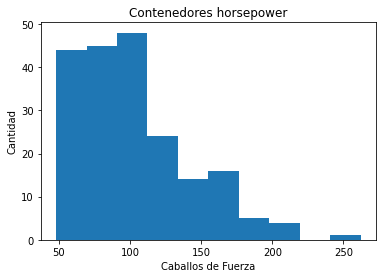

In [60]:
plt.pyplot.hist( autos["horsepower"] )

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("Caballos de Fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Contenedores horsepower")

Text(0.5, 1.0, 'Contenedores horsepower')

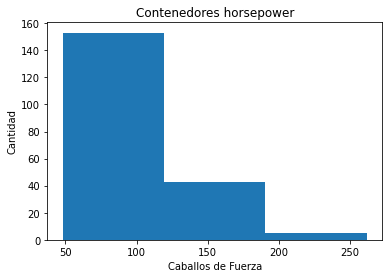

In [68]:
# Establecemos el valor de bins (contenedores) igual a 3

plt.pyplot.hist(autos["horsepower"], bins = 3)

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("Caballos de Fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Contenedores horsepower")

En esta columna quisieramos 3 contenedores de igual tamaño para poder utilizar la función `linspace(start_value, end_value, numbers_generated) de numpy`.

- **linspace**: Devuelve un número de muestras espaciadas uniformemente, calculadas sobre el intervalo **start, stop**.
- El punto final del intervalo se puede excluir opcionalmente.
- Por lo tanto, definimos los siguientes valores:

  - Para incluir el **valor mínimo** de caballos de fuerza establecemos **start_value = min( autos["horsepower"] )**.

  - Para incluir el **valor máximo** de caballos de fuerza establecemos **end_value = max( autos["horsepower"] )**.
 
  - Establecemos **4 contenedores**, por lo tanto, definimos **numbers_generated = 4**.  
  
- Generamos un contenedor con rangos desde el mínimo al máximo y un ancho de contenedor calculado equitativamente. 
- Los contenedores seran valores usados para determinar cuando uno de ellos termina y el otro comienza.
- la idea es etiquetar con una variable categórica los caballos de fuerza según donde se encuentre el valor de los caballos de fuerza del motor.

In [61]:
# Contenedores del rango de valores

bins = np.linspace( min( autos["horsepower"]), max( autos["horsepower"] ), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [62]:
# definimos los nombres de grupo que serán las variables categoricas de acuerdo al valor
# de horsepower

grupos = ['Low', 'Medium', 'High']

In [63]:
# Definimos una nueva columna con las categorias

autos['horsepower-binned'] = pd.cut(autos['horsepower'], bins, labels=grupos, 
                                    include_lowest=True )

# Verificamos el etiquetado de valores 
autos[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [64]:
# Verificamos las caracteristicas de la nueva columna de categórias
autos["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Contenedores horsepower')

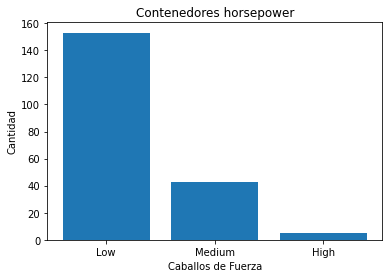

In [65]:
# Volvemos a graficar la distribucion de la nueva columna etiquetada de categórias
pyplot.bar(grupos, autos["horsepower-binned"].value_counts())

plt.pyplot.xlabel("Caballos de Fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Contenedores horsepower")

##  10. Grabar los datos corregidos en CSV para uso posterior de analisis   <a id='id10'> </a>

In [65]:
autos.to_csv("autos_corregidos.csv", index = False)
